# 02. Neural Network classification with Pytorch

## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 sample
n_samples = 1000

# Create circules
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"Firtst 5 samples of X: {X[:5]}")
print(f"\nFirtst 5 samples of y: {y[:5]}")

Firtst 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

Firtst 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0],
                        "X2":X[:, 1],
                        "label": y})

In [ ]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


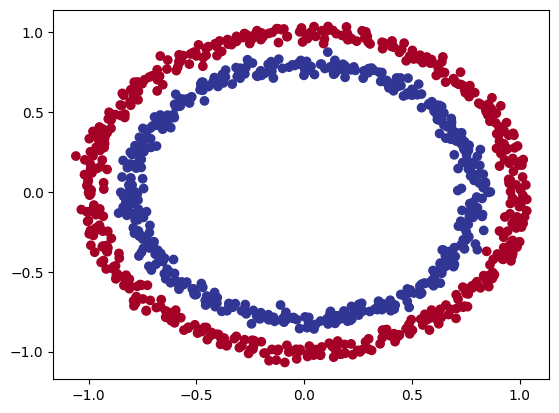

In [ ]:
# Visualize, visualize, visualise
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Viw the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values ofr one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values ofr one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch

torch.__version__

'2.9.0+cu126'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data into tensors

X =  torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and tests sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic (CPU or GPU)
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# import Pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

Now we've setup device agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and sent it to the target `device`

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [ ]:
model_0 = CircleModelV0().to(device)

In [ ]:
model_0, model_0.state_dict()

(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[ 0.2066, -0.5954],
                       [ 0.4741,  0.2683],
                       [-0.6415,  0.3426],
                       [-0.3349,  0.3526],
                       [-0.1174, -0.3483]], device='cuda:0')),
              ('layer_1.bias',
               tensor([ 0.5019, -0.0839,  0.0208, -0.1602,  0.1317], device='cuda:0')),
              ('layer_2.weight',
               tensor([[-0.1811, -0.1852,  0.2750, -0.0225,  0.1765]], device='cuda:0')),
              ('layer_2.bias', tensor([0.0883], device='cuda:0'))]))

In [ ]:
# Let's replicate tjhe model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use ?

Again...this is probleme specific

For example for regression you might want MAE or MSE
For classifiction you may want CrossEntropy or BinaryCrossEntropy

For activation function:
* Binary classification: Sigmoid
* Multi-class classification: softmax

In [ ]:
# Setup the lsoss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogistsLoss = sigmoid activation function build-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### 3. Train model

In [ ]:
X_train, y_train = X_train.to(device), y_train.to(device)
epochs = 100
accuracy = []

for epoch in range(epochs):
  ### Training

  model_0.train()
  #1. Forward pass
  y_pred = model_0(X_train).squeeze(dim=1)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimize zero_grad
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  acc = accuracy_fn(y_train, y_pred)
  accuracy.append(acc)



In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0467],
        [ 0.0120],
        [ 0.0653],
        [ 0.0418],
        [-0.0498]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logists to turn them into prediction probability
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5117],
        [0.5030],
        [0.5163],
        [0.5104],
        [0.4876]], device='cuda:0')

For our prediction probality values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class )

In [ ]:
# Get the labels
y_pred = torch.round(y_pred_probs)

# In full (in one setup: logist - probability - label)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check equality
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

# print y_pred_labels
print(y_pred.squeeze())

tensor([True, True, True, True, True], device='cuda:0')
tensor([1., 1., 1., 1., 0.], device='cuda:0')


### 3.1 Training and Testing *Loop*

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test  = X_test.to(device), y_test.to(device)

print(len(y_train), len(y_test))

epochs = 100

for epoch in range(epochs):
  ### training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss & acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_preds)

  # 3. Optimizer zero_grad
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  loss.backward()

  # 4. Optimizer step
  optimizer.step()

  ### Test
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_y_logists = model_0(X_test).squeeze()
    test_y_preds = torch.round(torch.sigmoid(test_y_logists))

    # 2. Calculate loss & acc
    test_loss = loss_fn(test_y_logists, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_y_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")


800 200
Epoch: 0 | Loss: 0.69382 | Accuracy: 50.12 | Test Loss: 0.69290 | Test Accuracy: 48.50000
Epoch: 10 | Loss: 0.69374 | Accuracy: 50.12 | Test Loss: 0.69296 | Test Accuracy: 48.00000
Epoch: 20 | Loss: 0.69366 | Accuracy: 50.12 | Test Loss: 0.69302 | Test Accuracy: 48.50000
Epoch: 30 | Loss: 0.69360 | Accuracy: 50.38 | Test Loss: 0.69307 | Test Accuracy: 49.00000
Epoch: 40 | Loss: 0.69354 | Accuracy: 50.38 | Test Loss: 0.69313 | Test Accuracy: 49.00000
Epoch: 50 | Loss: 0.69349 | Accuracy: 50.25 | Test Loss: 0.69319 | Test Accuracy: 48.50000
Epoch: 60 | Loss: 0.69344 | Accuracy: 50.25 | Test Loss: 0.69324 | Test Accuracy: 49.00000
Epoch: 70 | Loss: 0.69340 | Accuracy: 50.12 | Test Loss: 0.69330 | Test Accuracy: 50.00000
Epoch: 80 | Loss: 0.69336 | Accuracy: 49.88 | Test Loss: 0.69335 | Test Accuracy: 50.00000
Epoch: 90 | Loss: 0.69333 | Accuracy: 49.88 | Test Loss: 0.69340 | Test Accuracy: 51.00000


In [ ]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

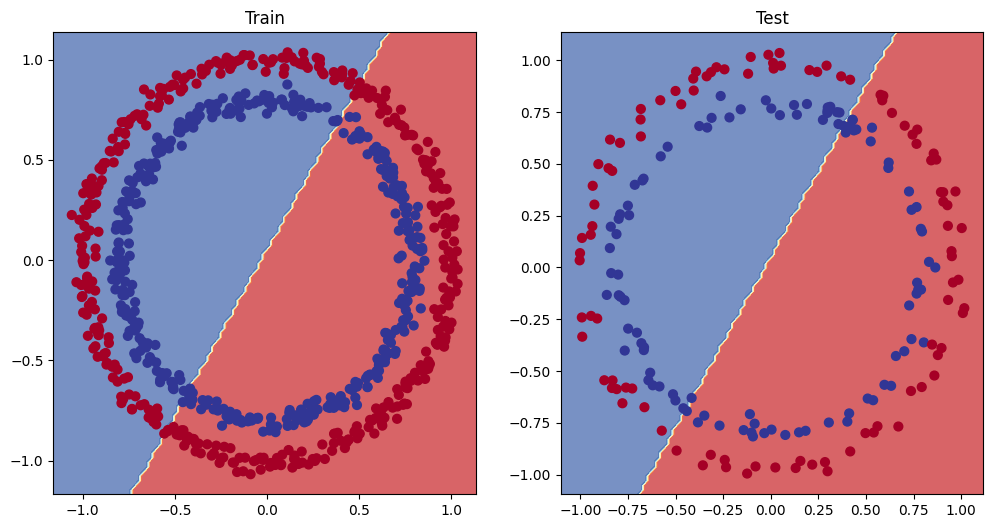

In [ ]:
# plot decision boundart of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function


Let's try and improve our model by:
* Adding more hiddent units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the numver of epochs: 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))


In [ ]:
model_1 = CircleModelV1().to(device)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
epochs = 1000
for epoch in range(epochs):
  ### Training
  model_1.train()
  y_logists =  model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logists))

  loss = loss_fn(y_logists, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_logists = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logists))
    test_loss = loss_fn(test_logists, y_test)
    test_acc = accuracy_fn(y_test,test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Accuracy: {acc: .5f} | Test Loss: {test_loss: .5f} | Test Accuracy: {test_acc: 5f}")



Epoch: 0 | Loss:  0.69396 | Accuracy:  50.87500 | Test Loss:  0.69261 | Test Accuracy:  51.000000
Epoch: 100 | Loss:  0.69305 | Accuracy:  50.37500 | Test Loss:  0.69379 | Test Accuracy:  48.000000
Epoch: 200 | Loss:  0.69299 | Accuracy:  51.12500 | Test Loss:  0.69437 | Test Accuracy:  46.000000
Epoch: 300 | Loss:  0.69298 | Accuracy:  51.62500 | Test Loss:  0.69458 | Test Accuracy:  45.000000
Epoch: 400 | Loss:  0.69298 | Accuracy:  51.12500 | Test Loss:  0.69465 | Test Accuracy:  46.000000
Epoch: 500 | Loss:  0.69298 | Accuracy:  51.00000 | Test Loss:  0.69467 | Test Accuracy:  46.000000
Epoch: 600 | Loss:  0.69298 | Accuracy:  51.00000 | Test Loss:  0.69468 | Test Accuracy:  46.000000
Epoch: 700 | Loss:  0.69298 | Accuracy:  51.00000 | Test Loss:  0.69468 | Test Accuracy:  46.000000
Epoch: 800 | Loss:  0.69298 | Accuracy:  51.00000 | Test Loss:  0.69468 | Test Accuracy:  46.000000
Epoch: 900 | Loss:  0.69298 | Accuracy:  51.00000 | Test Loss:  0.69468 | Test Accuracy:  46.000000


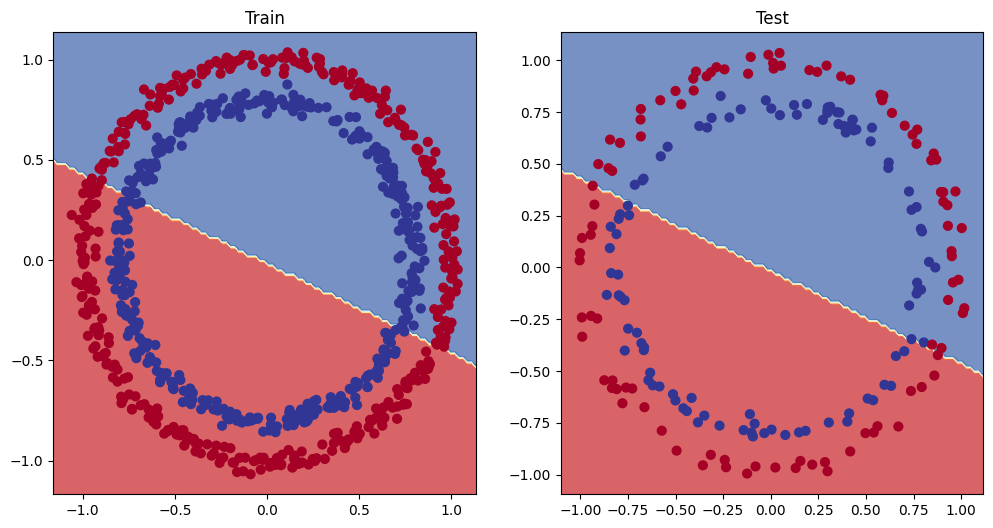

In [ ]:
# plot decision boundart of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit straight line

One way to troubleshoot to a larger probleme is to test out a smaller problem

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:10], y_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
len(X_regression), len(y_regression)

(100, 100)

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set, 20% for testing
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

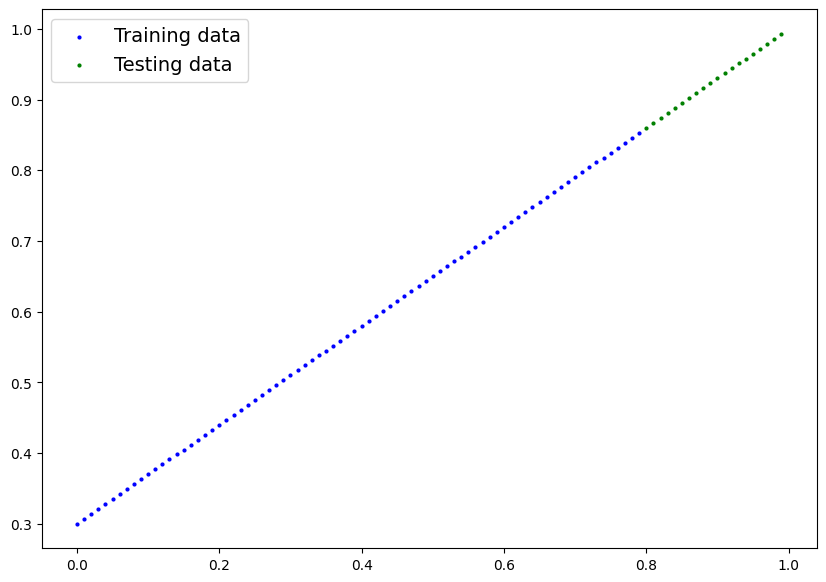

In [ ]:
plot_predictions(X_train_regression,y_train_regression,X_test_regression,y_test_regression);

### 5.2 Adjust `model_1` to fit a straight line

In [ ]:
# same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

In [ ]:
# Loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### Training
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Test Loss: {test_loss: .5f}")

Epoch: 0 | Loss:  0.57896 | Test Loss:  0.85703
Epoch: 100 | Loss:  0.22085 | Test Loss:  0.44787
Epoch: 200 | Loss:  0.07306 | Test Loss:  0.18890
Epoch: 300 | Loss:  0.06266 | Test Loss:  0.14795
Epoch: 400 | Loss:  0.05311 | Test Loss:  0.12532
Epoch: 500 | Loss:  0.04329 | Test Loss:  0.10208
Epoch: 600 | Loss:  0.03315 | Test Loss:  0.07711
Epoch: 700 | Loss:  0.02266 | Test Loss:  0.05214
Epoch: 800 | Loss:  0.01176 | Test Loss:  0.02688
Epoch: 900 | Loss:  0.00201 | Test Loss:  0.00220


In [ ]:
model_2.eval()
with torch.inference_mode():
  y_pred_test = model_2(X_test_regression)
y_pred_test

tensor([[0.8559],
        [0.8629],
        [0.8698],
        [0.8768],
        [0.8837],
        [0.8907],
        [0.8977],
        [0.9046],
        [0.9116],
        [0.9185],
        [0.9255],
        [0.9325],
        [0.9394],
        [0.9464],
        [0.9533],
        [0.9603],
        [0.9672],
        [0.9742],
        [0.9812],
        [0.9881]], device='cuda:0')

In [ ]:
y_test_regression

tensor([[0.8600],
        [0.8670],
        [0.8740],
        [0.8810],
        [0.8880],
        [0.8950],
        [0.9020],
        [0.9090],
        [0.9160],
        [0.9230],
        [0.9300],
        [0.9370],
        [0.9440],
        [0.9510],
        [0.9580],
        [0.9650],
        [0.9720],
        [0.9790],
        [0.9860],
        [0.9930]], device='cuda:0')

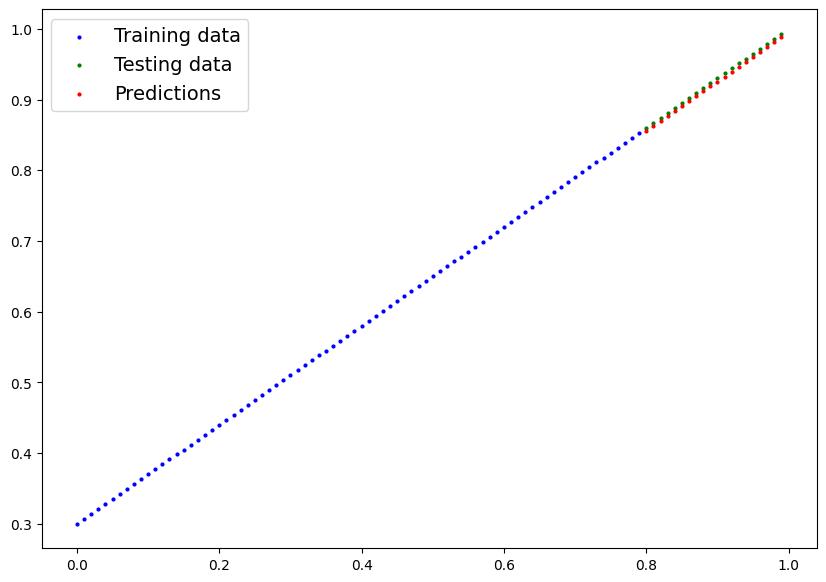

In [ ]:
plot_predictions(X_train_regression.cpu(), y_train_regression.cpu(), X_test_regression.cpu(),y_test_regression.cpu(),y_pred_test.cpu())

## 6. The missing piece: non-linearity



### 6.1 Recreating non-linear data (red and blue circles)




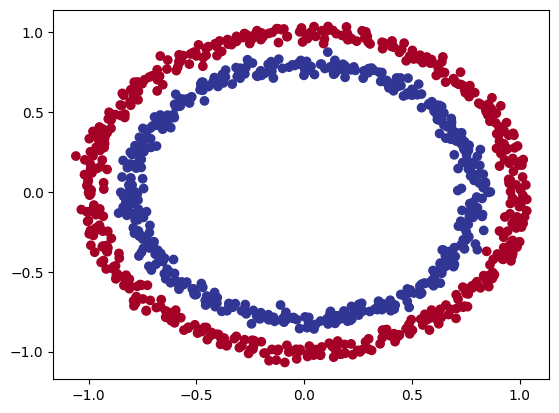

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and tests splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and tests sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

### 6.2 Building a model with non linearity
* linear = staight linear
* Non-linear = non-straight lines

In [ ]:
# Building a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### 6.3 Training `model_3`

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

In [ ]:
# Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 100
for epoch in range(epochs):
  ### Train
  model_3.train()
  y_logit = model_3(X_train).squeeze()
  y_pred  = torch.round(torch.sigmoid(y_logit))
  loss = loss_fn(y_logit, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Test
  model_3.eval()
  with torch.inference_mode():
    test_logist = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logist))
    test_loss = loss_fn(test_logist, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.6929463148117065 | Test Loss: 0.6932452321052551
Epoch: 10 | Loss: 0.692893385887146 | Test Loss: 0.6931801438331604
Epoch: 20 | Loss: 0.6928389072418213 | Test Loss: 0.6931130886077881
Epoch: 30 | Loss: 0.6927870512008667 | Test Loss: 0.6930469274520874
Epoch: 40 | Loss: 0.6927348971366882 | Test Loss: 0.6929800510406494
Epoch: 50 | Loss: 0.6926844716072083 | Test Loss: 0.6929125785827637
Epoch: 60 | Loss: 0.6926366090774536 | Test Loss: 0.6928507685661316
Epoch: 70 | Loss: 0.6925910711288452 | Test Loss: 0.6927937269210815
Epoch: 80 | Loss: 0.6925510764122009 | Test Loss: 0.6927419304847717
Epoch: 90 | Loss: 0.6925146579742432 | Test Loss: 0.6926918029785156


### 6.4 Evaluating a model trained with non-linear activations functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

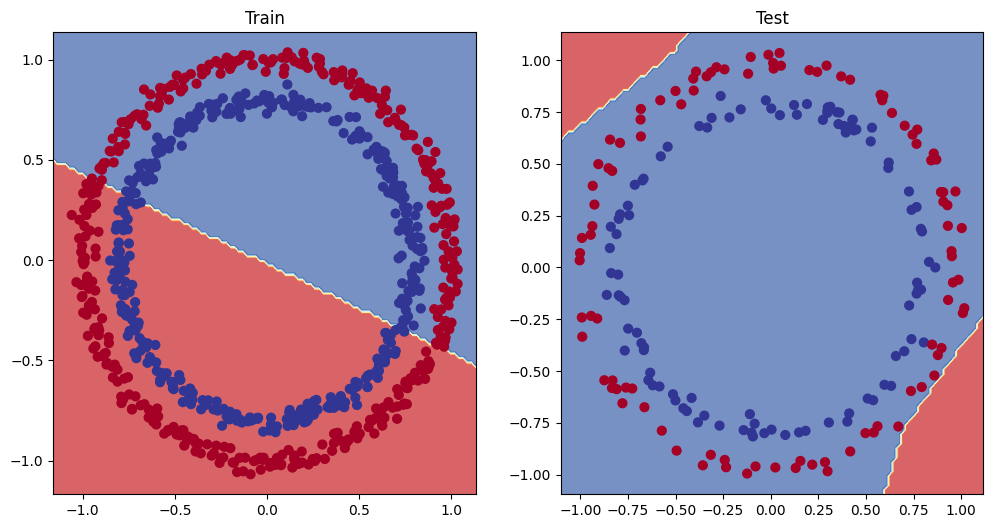

In [ ]:
# plot decision boundart of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activations functions

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype


torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

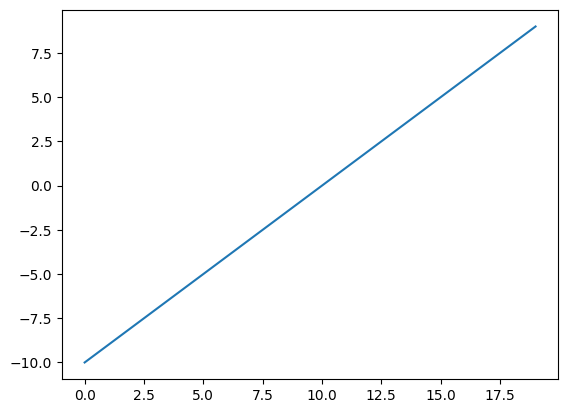

In [ ]:
plt.plot(A)

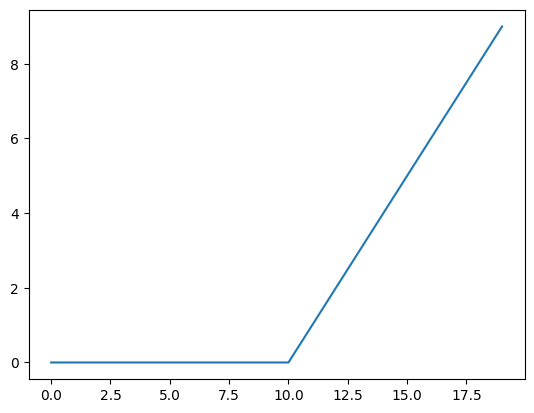

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.tensor:
  return torch.maximum(torch.tensor(0), x)  # inputs must be tensors

  relu(A)

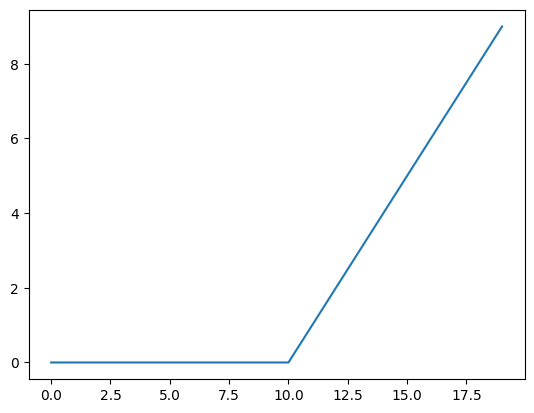

In [ ]:
plt.plot(relu(A))

In [ ]:
# Now let's dot the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

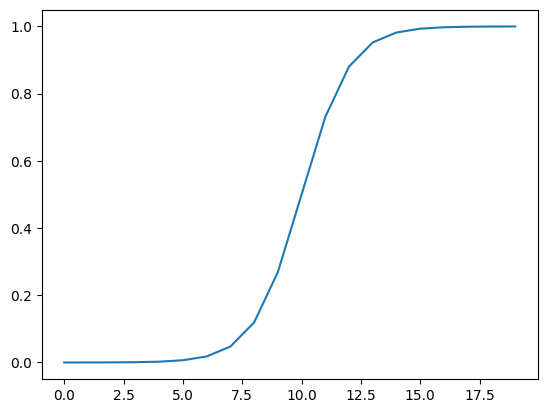

In [ ]:
plt.plot(torch.sigmoid(A))

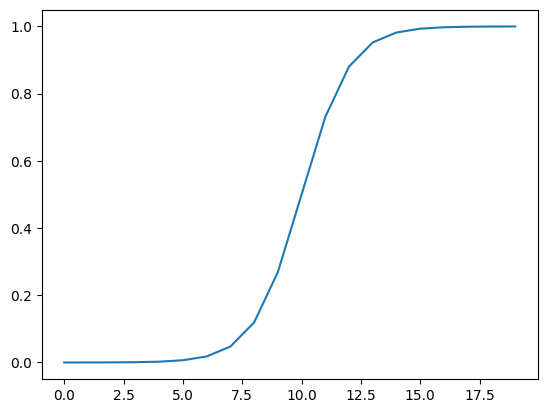

In [ ]:
plt.plot(sigmoid(A))

 ## 8. Putting it  all together with a multi-class classification problem

 * Binary classification = one thing or another (cat vs dog, spam vs no spam, fraud or not fraud)
 * Multi-class classification = more than one thing or another (cat vs dog vs chicken)

### 8.1 Creating a toy multi-class dataset

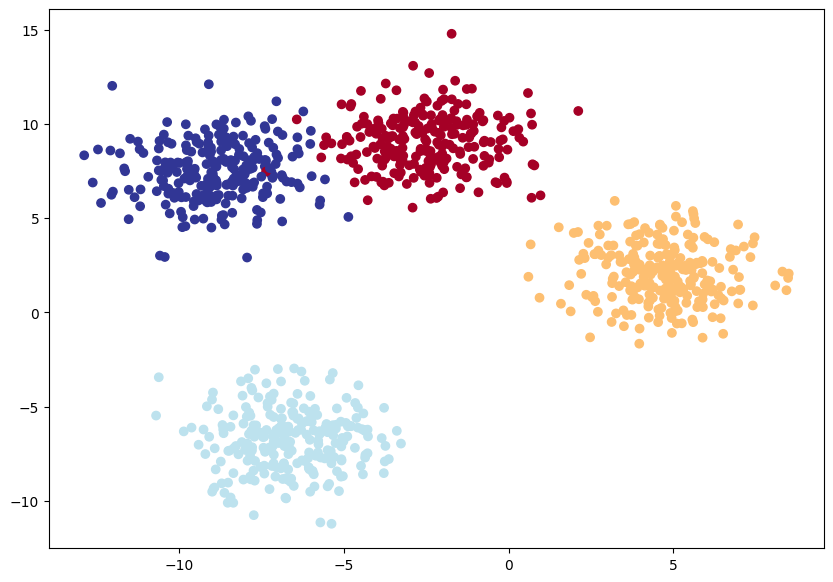

In [ ]:
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers= NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into traina and split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2,random_state=42)

# 4 Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a mult-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8) :
    """ Initializes multi-class classification
    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimzer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

### 8.4 Getting predictin probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities adn then to prediction labels

Logits -> Pred probs -> Pred labels

In [ ]:
# Let's output the raw outputs of our model(logit)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
X_blob_test.dtype, X_blob_train.dtype

(torch.float32, torch.float32)

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop for multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs
epochs = 100

# Put data io the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop throught data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                     y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # Print out what's happening'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} |Acc: {acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.1588 |Acc: 40.38 | Test Loss: 1.0755 | Test Acc: 48.00
Epoch: 10 | Loss: 0.6448 |Acc: 96.75 | Test Loss: 0.6607 | Test Acc: 97.50
Epoch: 20 | Loss: 0.4254 |Acc: 98.50 | Test Loss: 0.4307 | Test Acc: 100.00
Epoch: 30 | Loss: 0.2529 |Acc: 99.12 | Test Loss: 0.2451 | Test Acc: 99.50
Epoch: 40 | Loss: 0.1123 |Acc: 99.25 | Test Loss: 0.1023 | Test Acc: 99.50
Epoch: 50 | Loss: 0.0663 |Acc: 99.25 | Test Loss: 0.0585 | Test Acc: 99.50
Epoch: 60 | Loss: 0.0507 |Acc: 99.25 | Test Loss: 0.0429 | Test Acc: 99.50
Epoch: 70 | Loss: 0.0430 |Acc: 99.25 | Test Loss: 0.0349 | Test Acc: 99.50
Epoch: 80 | Loss: 0.0384 |Acc: 99.25 | Test Loss: 0.0299 | Test Acc: 99.50
Epoch: 90 | Loss: 0.0352 |Acc: 99.25 | Test Loss: 0.0266 | Test Acc: 99.50


### 8.6 Making and Evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabilites
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

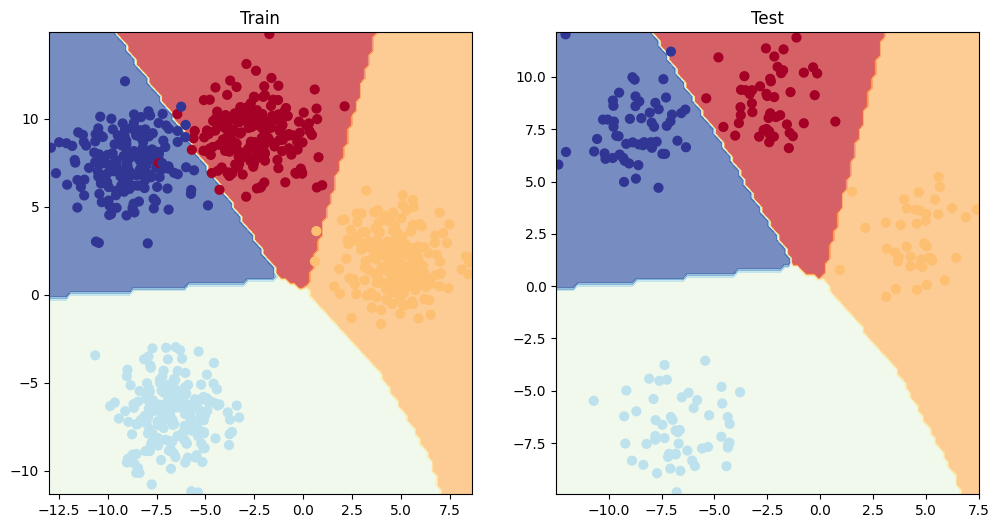

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 22.1 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')